<a href="https://colab.research.google.com/github/JeongSeong/brainML_HW/blob/main/Midterm_Project_Training_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

**Load TADPOLE* dataset (csv file) from Google Drive**
-------------------------------------------------------
*The Alzheimer's Disease Prediction Of Longitudinal Evolution
(https://tadpole.grand-challenge.org/)

### -Subjects: 1707 (1363 Train (80%) + 344 Test (20%))


### -Features: 72
*   2 demographic feature: MMSE, ADAS13
*   70 mean values of cortical thickness

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

csv_file_train = '/content/gdrive/My Drive/BNCS401_Midterm_Project/Train_data_reupdated.csv'  # Set your path
train_data = pd.read_csv(csv_file_train)
train_data

# DXCHANGE: clinical label (1-CN, 2-MCI, 3-AD)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


,RID,DXCHANGE,AGE,MMSE,ADAS13,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,4084,1,68.4,30,10.00,2.700,2.635,2.613,2.904,2.311,1.647,2.139,2.652,2.604,2.480,3.095,2.144,2.792,2.207,2.903,2.617,4.117,2.701,,3.127,3.051,2.305,2.872,2.732,2.026,3.756,2.813,2.762,2.556,2.916,2.695,2.259,2.690,2.017,2.421,2.949,2.570,2.370,2.674,3.004,2.369,1.599,2.208,2.650,2.739,2.544,3.018,2.377,2.880,2.322,2.657,2.489,3.620,2.711,,2.593,2.792,2.660,1.993,3.734,2.390,2.817,2.471,2.990,2.667,2.490,2.523,2.254,2.171,2.862
1,2196,2,68.2,30,13.00,2.453,2.992,2.470,2.965,2.438,1.584,1.910,2.900,2.451,2.335,2.771,2.354,2.712,2.001,2.729,2.363,3.613,2.475,,3.196,3.334,2.343,2.729,2.627,1.742,3.383,2.647,2.758,2.394,2.634,2.334,2.241,2.824,1.865,2.383,2.866,2.334,2.793,2.413,2.874,2.316,1.478,1.909,2.780,2.589,2.133,3.036,2.329,2.687,2.070,2.783,2.594,3.405,2.367,,2.582,2.977,2.489,1.868,3.220,2.683,2.569,2.372,2.854,2.867,2.233,2.793,1.987,2.428,2.943
2,657,1,77.7,29,15.33,2.249,2.296,2.315,2.681,2.420,1.386,1.830,2.466,2.3

#WRITE YOUR CODE HERE!!!!!!!

In [ ]:
# Build your model
for i in train_data.columns:#since there are object type data and null, it needs to be changed.
  if train_data[i].dtype=='object':#for object type data column.
    train_data[i]=pd.to_numeric(train_data[i], errors='coerce')#numeric entries are changed to float type and missing entries are replaced with NaN.
  if train_data[i].isnull().any():#missing entries are replaced with NaN.
    train_data[i].loc[train_data[i].isnull()]=np.NaN

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
train_data= SimpleImputer(strategy='median').fit_transform(train_data)#replace missing values using the median along each column.
train_columns_list=[i for i in range(len(train_data[0])) if i not in [0,1,3,4]]#a columns list for training data(without RID, DXCHANGE, MMSE, ADAS13)
x=StandardScaler().fit_transform(train_data[:, train_columns_list])#an ndarray for training data #index 699 row of the initial data order has some median data.
y=train_data[:, [3, 4]]# an ndarray for target data(MMSE, ADAS13)
dxchange=train_data[:,1]# an array for target data(DXCHANGE)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
'''
since non-polynomial linear regression had the best score for prediction among polynomial or non-polynomial linear and sgd regression,
I used linear regression for MMSE and adas13 score.
'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()#making linear regression model
lin_reg.fit(x,y)#fitting train data and target
#10 fold cross validation score
print('cross validation score: ',np.sqrt(-cross_val_score(lin_reg, x, y, scoring="neg_mean_squared_error", cv=10)).mean())#since the test data is 20% of the total data, I chose k=10.
'''
x, y linear regression cross_val: 5.27733401244674
mmse linear reg cross_val: 2.16891415238337, score: 0.41485347954480956
adas13 lin reg cross_val: 7.140578973138697, score: 0.484777196517327
#####################################################################################################

mmse_SGDRegressor(alpha=0.1, average=False, early_stopping=True, eta0=0.01, l1_ratio=0.4,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', shuffle=True, validation_fraction=0.2)
            cross_val: 2.1448360763154763 , score: 0.37930080557313506

adas13_SGDRegressor(alpha=0.3, average=False, early_stopping=True, eta0=0.1, l1_ratio=0,
            learning_rate='adaptive', loss='squared_loss', max_iter=1000,
            n_iter_no_change=5, penalty='elasticnet', shuffle=True, validation_fraction=0.2)
            cross_val: 7.110935165181526, score: 0.4647449371807022
###################################################################################################

mmse_SGDRegressor(alpha=0.1, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.005, fit_intercept=True, l1_ratio=0.1,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.2, verbose=0, warm_start=False)
            cross_val: 2.143334672668816, score: 0.3968742861103888

adas13_SGDRegressor(alpha=0.1, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.4,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.2, verbose=0, warm_start=False)
             cross_val: 7.068923905893371, score: 0.4731238425894331
##################################################################################################

mmse_SGDRegressor(alpha=0.1, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.007, fit_intercept=True, l1_ratio=0.2,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.2, verbose=0, warm_start=False)
             cross_val: 2.1594286831952565 , score: 0.3955886718963466

adas13_SGDRegressor(alpha=0.1, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.003, fit_intercept=True, l1_ratio=0.4,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.2, verbose=0, warm_start=False)
             cross_val: 7.1153570006336935 , score: 0.4732709028728066
################################################################################################

mmse_SGDRegressor(alpha=0.3, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.005, fit_intercept=True, l1_ratio=0.1,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.2, verbose=0, warm_start=False)
             cross_val: 2.143473713335877 , score:  0.37867148737035894

adas13_SGDRegressor(alpha=0.1, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.2,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.2, verbose=0, warm_start=False)
             cross_val: 7.07580935097248 , score: 0.47477621211427457
###############################################################################################

mmse_SGDRegressor(alpha=0.2, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.005, fit_intercept=True, l1_ratio=0.1,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.2, verbose=0, warm_start=False)
            cross_val: 2.1443922431138387 , score: 0.3913663882716516

adas13_SGDRegressor(alpha=0.2, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.007, fit_intercept=True, l1_ratio=0.1,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.2, verbose=0, warm_start=False)
             cross_val: 7.070435704050335 , score: 0.46752382605657083
#################################################################################################

ElasticNet(alpha=0.15, copy_X=True, fit_intercept=True, l1_ratio=0.2,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
           cross_val: 5.2145189475019125 , score: 0.4699015488222758

above models and scores are just some of the things I've tried.
'''

cross validation score:  5.27733401244674


"\nx, y linear regression cross_val: 5.27733401244674\nmmse linear reg cross_val: 2.16891415238337, score: 0.41485347954480956\nadas13 lin reg cross_val: 7.140578973138697, score: 0.484777196517327\n#####################################################################################################\n\nmmse_SGDRegressor(alpha=0.1, average=False, early_stopping=True, eta0=0.01, l1_ratio=0.4,\n             learning_rate='adaptive', loss='squared_loss', max_iter=1000,\n             n_iter_no_change=5, penalty='elasticnet', shuffle=True, validation_fraction=0.2) \n            cross_val: 2.1448360763154763 , score: 0.37930080557313506\n\nadas13_SGDRegressor(alpha=0.3, average=False, early_stopping=True, eta0=0.1, l1_ratio=0, \n            learning_rate='adaptive', loss='squared_loss', max_iter=1000, \n            n_iter_no_change=5, penalty='elasticnet', shuffle=True, validation_fraction=0.2)\n            cross_val: 7.110935165181526, score: 0.4647449371807022\n#############################

score:  0.5715333822450477
confusion matrix


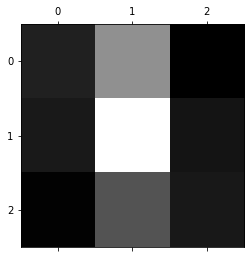

real row and predict column


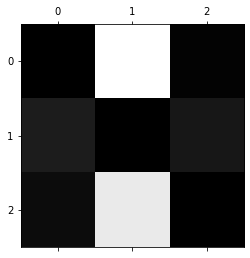

"below models are what I tried. Though the models are named as reg, it is classification model. It is my mistake.\n\nsgd_reg=SGDClassifier(penalty='elasticnet', alpha=0.1, shuffle=True, #l1_ratio\n                     learning_rate='adaptive', eta0=0.1, early_stopping=True, \n                     validation_fraction=0.2, verbose=1)\nsgd_reg.fit(x, dxchange) #loss: 0.285239\nsgd_reg.score(x, dxchange) #0.5451210564930301\n########################################################################################################\n\nsgd_reg=SGDClassifier(alpha=1, average=False, class_weight=None, early_stopping=True,\n              epsilon=0.1, eta0=0.1, fit_intercept=True,\n              l1_ratio=0.5488135039273248, learning_rate='adaptive',\n              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,\n              penalty='elasticnet', power_t=0.5, random_state=None,\n              shuffle=True, tol=0.001, validation_fraction=0.2, verbose=1,\n              warm_start=False

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
def brighter_is_worser(real, predict):# this function is for showing confusion matrix
  conf_mx=confusion_matrix(real, predict)
  print('confusion matrix')
  plt.matshow(conf_mx, cmap=plt.cm.gray)
  plt.show()
  print('real row and predict column')
  row_sums=conf_mx.sum(axis=1, keepdims=True)
  norm_conf_mx=conf_mx/row_sums
  np.fill_diagonal(norm_conf_mx, 0)
  plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
  plt.show()
#among polinomial or non-polinomial OvO sgd, OvA sgd, and softmax classification, OvA sgd classifier got the best score
from sklearn.model_selection import GridSearchCV#I used grid search to find proper hyper parameter
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(penalty='elasticnet', shuffle=True,
                     learning_rate='adaptive', eta0=0.1, early_stopping=True,
                     validation_fraction=0.2)
np.random.seed(42)
random=np.random.rand(20)
param_grid=[{'alpha':list(random[:10]), 'l1_ratio':list(random[10:])}]

grid_search=GridSearchCV(sgd_clf, param_grid, cv=10,
                              scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x,dxchange)
sgd_clf=grid_search.best_estimator_
sgd_clf.fit(x,dxchange)#Avg. loss: 0.274994
print('score: ',sgd_clf.score(x, dxchange))#0.5715333822450477
'''SGDClassifier(alpha=0.15599452033620265, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.020584494295802447, learning_rate='adaptive',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.2, verbose=1,
              warm_start=False)'''
brighter_is_worser(dxchange, cross_val_predict(sgd_clf, x, dxchange, cv=10))

'''below models are what I tried. Though the models are named as reg, it is classification model. It is my mistake.

sgd_reg=SGDClassifier(penalty='elasticnet', alpha=0.1, shuffle=True, #l1_ratio
                     learning_rate='adaptive', eta0=0.1, early_stopping=True,
                     validation_fraction=0.2, verbose=1)
sgd_reg.fit(x, dxchange) #loss: 0.285239
sgd_reg.score(x, dxchange) #0.5451210564930301
########################################################################################################

sgd_reg=SGDClassifier(alpha=1, average=False, class_weight=None, early_stopping=True,
              epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.5488135039273248, learning_rate='adaptive',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.2, verbose=1,
              warm_start=False)
sgd_reg.fit(x,dxchange) #loss:0.306676
sgd_reg.score(x, dxchange) #0.5077035950110051
##########################################################################################################

sgd_reg=SGDClassifier(alpha=0.21167117460322915, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.08076327655085713, learning_rate='adaptive',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.2, verbose=1,
              warm_start=False).fit(x,dxchange)
#Avg. loss: 0.303415
###########################################################################################################

SGDClassifier(alpha=0.16911083656253545, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.04689631938924976, learning_rate='adaptive',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.2, verbose=1,
              warm_start=False).fit(x, dxchange)
#Avg. loss: 0.289477, score: 0.5451210564930301
########################################################################################################

SGDClassifier(alpha=0.3745401188473625, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15599452033620265, learning_rate='adaptive',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.2, verbose=0,
              warm_start=False)
#loss: 0.306677, score:0.5077035950110051
#######################################################################################################

SGDClassifier(alpha=0.07546301953822482, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.1543787989679427, learning_rate='adaptive',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.2, verbose=0,
              warm_start=False)
#loss:0.292431
######################################################################################################

SGDClassifier(alpha=0.15, average=False, class_weight=None, early_stopping=True,
              epsilon=0.1, eta0=0.1, fit_intercept=True, l1_ratio=0.05,
              learning_rate='adaptive', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.2, verbose=1, warm_start=False).fit(x, dxchange)
#loss: 0.287940
###############################################################################################

SGDClassifier(alpha=0.7, average=False, class_weight=None, early_stopping=True,
              epsilon=0.1, eta0=0.1, fit_intercept=True, l1_ratio=0,
              learning_rate='adaptive', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.2, verbose=1, warm_start=False)
#Avg. loss: 0.292289, score:  0.516507703595011
#################################################################################################


'''

In [ ]:
# Load test dataset
csv_file_test = '/content/gdrive/My Drive/BNCS401_Midterm_Project/Test_data_ageupdated.csv'  # Set your path
test_data = pd.read_csv(csv_file_test)
test_data

,RID,AGE,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST105TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST106TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST107TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST108TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST109TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST110TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST111TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST113TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST114TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST115TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST116TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST117TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST118TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST119TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST121TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST123TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST129TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST130TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST13TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST14TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST15TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST23TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST24TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST25TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST26TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST31TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST32TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST34TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST35TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST36TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST38TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST39TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST40TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST43TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST44TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST45TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST46TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST47TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST48TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST49TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST50TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST51TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST52TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST54TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST55TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST56TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST57TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST58TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST59TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST60TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST62TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST64TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST72TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST73TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST74TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST82TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST83TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST84TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST85TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST90TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST91TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST93TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST94TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST95TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST97TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST98TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST99TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,1002,76.3,1.996,2.220,2.342,2.803,2.230,1.402,1.764,2.156,2.026,1.941,2.964,2.122,2.454,1.925,2.451,2.311,3.016,2.317,1.121,2.956,2.936,2.219,2.907,2.320,1.573,3.061,2.696,2.529,2.283,2.949,2.293,2.097,2.686,1.768,2.387,2.674,1.819,2.135,2.133,3.003,2.374,1.411,1.727,2.434,2.157,2.063,3.182,2.085,2.485,1.905,2.488,2.182,3.563,2.187,0.975,2.338,2.253,2.476,1.639,3.655,2.507,2.461,2.157,2.911,2.410,1.968,2.800,1.767,2.080,2.766
1,260,78.6,2.209,2.805,2.386,2.710,2.209,1.517,1.648,2.457,2.184,2.132,3.077,2.279,2.552,2.169,2.338,2.342,4.067,2.303,1.082,3.035,2.973,2.370,2.669,2.502,1.914,3.925,2.438,2.820,2.380,2.932,2.328,2.134,2.831,1.838,2.635,2.786,2.219,2.797,2.456,2.797,2.147,1.469,1.729,2.692,2.329,2.274,2.994,2.268,2.627,2.142,2.458,2.314,3.839,2.167,1.228,2.366,2.834,2.320,1.607,3.849,2.843,2.619,2.484,2.811,2.402,1.950,2.685,1.795,2.332,2.965
2,1406,61.1,2.114,3.157,2.700,2.856,2.463,1.610,1.671,2.720,2.174,2.170,2.997,2.353,2.818,1.856,2

In [ ]:
# Sample code to save the csv file into Google Drive
for i in test_data.columns:#since there are object type data and null, it needs to be changed.
  if test_data[i].dtype=='object':#for object type data column.
    test_data[i]=pd.to_numeric(test_data[i], errors='coerce')#numeric entries are changed to float type and missing entries are replaced with NaN.
  if test_data[i].isnull().any():#missing entries are replaced with NaN.
    test_data[i].loc[test_data[i].isnull()]=np.NaN
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
test_data= SimpleImputer(strategy='median').fit_transform(test_data)
RID=test_data[:, 0]# store RID
x=StandardScaler().fit_transform(test_data[:, 1:])#making data

reg=lin_reg.predict(x)# predict MMSE and ADAS13
clf=sgd_clf.predict(x)# predict DXCHANGE
data=[[RID[i], reg[i][0], reg[i][1], clf[i]] for i in range(len(RID))]
test_prediction = pd.DataFrame(data, columns = ['RID', 'MMSE', 'ADAS13', 'DXCHANGE'])
test_prediction.to_csv('/content/gdrive/My Drive/Test_prediction.csv', index=False)
!cp Test_prediction.csv /content/gdrive/My Drive/BNCS401_Midterm_Project

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


cp: target 'Drive/BNCS401_Midterm_Project' is not a directory
